<a href="https://colab.research.google.com/github/mkbahk/QuantumComputing/blob/main/QuantumToyAlgorithm_QFT_06_Copilot_mkbahk_20250423.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
%pip install qiskit[visualization]==1.2.4
%pip install qiskit-aer==0.15.1
%pip install git+https://github.com/qiskit-community/qiskit-textbook.git#subdirectory=qiskit-textbook-src

  Cloning https://github.com/qiskit-community/qiskit-textbook.git to /tmp/pip-req-build-h3smmjlh
  Running command git clone --filter=blob:none --quiet https://github.com/qiskit-community/qiskit-textbook.git /tmp/pip-req-build-h3smmjlh
  Resolved https://github.com/qiskit-community/qiskit-textbook.git to commit 0ae905083ec3872d7ddc6bb4001d5468f476d93f
  Preparing metadata (setup.py) ... done


In [64]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, transpile, assemble
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_histogram, plot_state_city, plot_bloch_multivector
from qiskit_textbook.tools import array_to_latex
from qiskit_aer import Aer
from IPython.display import display, Math
import numpy as np
#import matplotlib.pyplot as plt

In [152]:
def qft(n):
    """n개의 큐빗을 갖는 Quantum Fourier Transform(QFT) 회로를 생성"""
    qc = QuantumCircuit(n)
    for j in range(n):
        for k in range(j):
            qc.cp(np.pi / 2**(j-k), k, j)  # Controlled phase shift
        ###for
        qc.h(j)  # Hadamard gate 적용
    ###for

    # 큐빗 순서 뒤집기 (Qiskit의 큐빗 순서와 물리적 구현 간 차이를 보정)
    for i in range(n//2):
        qc.swap(i, n-i-1)
    ###for

    qc.name = "QFT"
    return qc
###for

In [153]:
# 3큐빗을 사용하여 |001⟩ 상태를 초기화하는 회로
n_qubits = 3
qc = QuantumCircuit(n_qubits)

# |001⟩ 상태 준비 (X 게이트를 2번 큐빗에 적용)
qc.x(0)

# QFT 적용
qft_circuit = qft(n_qubits)
qc.append(qft_circuit.to_gate(), range(n_qubits))
qc.measure_all()

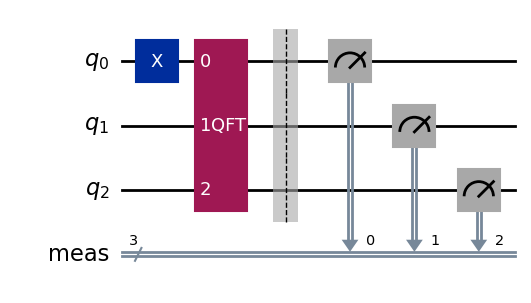

In [154]:
qc.draw("mpl")

In [157]:
# 시뮬레이터 설정 및 실행
simulator = Aer.get_backend('qasm_simulator')

tqc = transpile(qc, simulator)
#qobj = assemble(tqc)

result = simulator.run(tqc, shots=1024).result()
counts = result.get_counts()

# 결과 출력
print(counts)

{'011': 124, '111': 137, '100': 129, '001': 137, '010': 135, '000': 116, '101': 121, '110': 125}


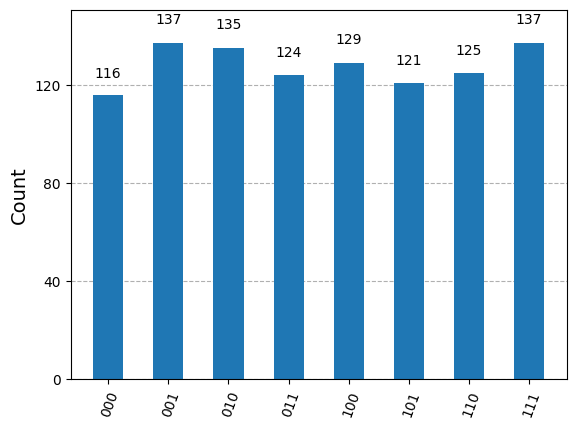

In [158]:
plot_histogram(counts)